# Analysis of the Life, Work, and Death of 1.22M People

Data from: https://www.kaggle.com/datasets/imoore/age-dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
%load_ext sql

In [6]:
%sql postgresql://isdb@localhost/postgres

# OCCUPATION

# General look at the dataset

In [83]:
%%sql 

-- Check what country names exist; filtered to only include the top 10 most listed countries

SELECT COUNTRY, COUNT(*)
FROM People
WHERE Country != 'None'
GROUP BY DISTINCT Country
ORDER BY COUNT(*) DESC
LIMIT 10;

 * postgresql://isdb@localhost/postgres
10 rows affected.


country,count
United States of America,152761
Germany,95081
France,78666
United Kingdom; United Kingdom of Great Britain and Ireland,29684
Sweden,26915
Spain,26084
United Kingdom,22498
Canada,22386
Poland,19323
United Kingdom of Great Britain and Ireland,19026


The top 5 countries that people are from in the dataset are The United States, Germany, France, The United Kingdom, and Sweden 

In [34]:
%%sql

-- The most common occupations in the dataset --

SELECT Occupation, COUNT(*)
FROM People
WHERE Occupation != 'None'
GROUP BY DISTINCT Occupation
ORDER BY COUNT(*) DESC
LIMIT 10;

 * postgresql://isdb@localhost/postgres
10 rows affected.


occupation,count
Artist,281512
Politician,195390
Athlete,110943
Researcher,90709
Military personnel,52911
Religious figure,37086
Businessperson,19529
Architect,17865
Journalist,16002
Teacher,15693


In [14]:
%%sql most_common_occupations << 
    SELECT Occupation, COUNT(*)
    FROM People
    WHERE Occupation != 'None'
    GROUP BY DISTINCT Occupation
    ORDER BY COUNT(*) DESC
    LIMIT 10;

 * postgresql://isdb@localhost/postgres
10 rows affected.
Returning data to local variable most_common_occupations


In [10]:
most_common_occupations

occupation,count
Artist,281512
Politician,195390
Athlete,110943
Researcher,90709
Military personnel,52911
Religious figure,37086
Businessperson,19529
Architect,17865
Journalist,16002
Teacher,15693


In [8]:
mco = most_common_occupations.DataFrame()

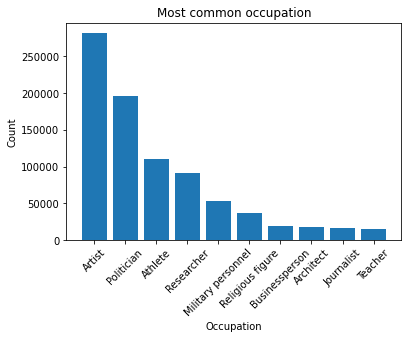

In [14]:
plt.bar(x = mco['occupation'], height = mco['count'])
plt.xticks(rotation=45)
plt.title('Most common occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

The top three most common occupations are Artist, Politician, and Athlete

# Conclusions:
- The top 5 countries that people are from in the dataset are The United States, Germany, France, The United Kingdom, and Sweden
- The top 3 most common occupations in the dataset are Artist, Politician, and Athlete

# [Occupations] Question 1: Does country impact occupation?

In [6]:
%%sql

-- What countries have the most of the top three occupations (Artist)? --

SELECT Country, COUNT(*)
FROM People
WHERE Occupation = 'Artist'
GROUP BY Country
ORDER BY COUNT(*) DESC
LIMIT 5;

 * postgresql://isdb@localhost/postgres
5 rows affected.


country,count
None,50104
United States of America,39534
Germany,23208
France,21040
Spain,8775


The countries with the most Artists are The United States, Germany, France, and Spain

In [110]:
%%sql
--What countries have the most of the top three occupations (Politician)?

SELECT Country, COUNT(*)
FROM People
WHERE Occupation = 'Politician'
GROUP BY Country
ORDER BY COUNT(*) DESC
LIMIT 5;

 * postgresql://isdb@localhost/postgres
5 rows affected.


country,count
United States of America,30086
None,26639
Germany,17364
France,16951
Canada,10160


The countries with the most Politicians are The United States, Germany, France, and Canada

In [82]:
%%sql

-- What countries have the most of the top three occupations (Athlete)? --

SELECT Country, COUNT(*)
FROM People
WHERE Occupation = 'Athlete'
GROUP BY Country
ORDER BY COUNT(*) DESC
LIMIT 6;

 * postgresql://isdb@localhost/postgres
6 rows affected.


country,count
United States of America,25269
None,14209
United Kingdom; United Kingdom of Great Britain and Ireland,10638
United Kingdom,5502
Australia,4594
France,3630


The countries with the most Athletes are The United States, The United Kingdom, Australia, and France

In [10]:
%%sql

--Most common jobs in each country
with pop_occ_country as (
    SELECT Country, Occupation, COUNT(Occupation) as cnt_occupation_country,
    RANK () OVER (PARTITION BY Country ORDER BY COUNT(Occupation) DESC) AS pop_rank
    FROM People
    WHERE Occupation != 'None' and Country != 'None'
    GROUP BY Country, Occupation
    ORDER BY Country, pop_rank ASC
)
, occ_rank_country as (
    SELECT Country, Occupation, cnt_occupation_country, pop_rank
    FROM pop_occ_country
    WHERE (cnt_occupation_country > 50) and (pop_rank = 1)
    ORDER BY cnt_occupation_country DESC
    
)

SELECT *
FROM occ_rank_country;


 * postgresql://isdb@localhost/postgres
201 rows affected.


country,occupation,cnt_occupation_country,pop_rank
United States of America,Artist,39534,1
Germany,Artist,23208,1
France,Artist,21040,1
United Kingdom; United Kingdom of Great Britain and Ireland,Athlete,10638,1
Canada,Politician,10160,1
Spain,Artist,8775,1
Sweden,Artist,8612,1
United Kingdom,Artist,6150,1
Kingdom of the Netherlands,Artist,5983,1
Italy; Kingdom of Italy,Artist,5867,1


Since the most common occupation is either Artist or Politician in most countries, we decided to filter out those two occupations

In [9]:
%%sql
--Since the most common occupation is either Artist or Politician in most countries, we decdided to filter that out
--Most common jobs in each country not including countries where the top occupations were either Artist or Politician

with pop_occ_country as (
    SELECT Country, Occupation, COUNT(Occupation) as cnt_occupation_country,
    RANK () OVER (PARTITION BY Country ORDER BY COUNT(Occupation) DESC) AS pop_rank
    FROM People
    WHERE Occupation != 'None' and Country != 'None'
    GROUP BY Country, Occupation
    ORDER BY Country, pop_rank ASC
)
, occ_rank_country as (
    SELECT Country, Occupation, cnt_occupation_country, pop_rank
    FROM pop_occ_country
    WHERE (cnt_occupation_country > 50) and (pop_rank = 1) and (occupation != 'Politician' and occupation != 'Artist')
    ORDER BY cnt_occupation_country DESC
    
)

SELECT *
FROM occ_rank_country;


 * postgresql://isdb@localhost/postgres
17 rows affected.


country,occupation,cnt_occupation_country,pop_rank
United Kingdom; United Kingdom of Great Britain and Ireland,Athlete,10638,1
Australia,Athlete,4594,1
New Zealand,Athlete,1910,1
South Africa,Athlete,823,1
Russia,Athlete,324,1
Ukraine,Military personnel,283,1
Wales,Athlete,247,1
Yugoslavia,Athlete,239,1
Kingdom of Prussia,Teacher,144,1
Slovakia; Czechoslovakia,Athlete,84,1


# Conclusions: 
- The countries with the most Artists are The United States, Germany, France, and Spain
- The countries with the most Politicians are The United States, Germany, France, and Canada
- The countries with the most Athletes are The United States, The United Kingdom, Australia, and France
- Being from a particular country doesn't seem to strongly correlate with having a particular occupation
- In general, individuals are most likely to be Artists, Politicians, or Athletes
- If individuals aren't Artists or Politicians, they tend to be Athletes, Military personnel, Teachers, or Researchers

# [Occupations] Question 2: How does time impact the types of occupations that are popular?

In [15]:
%%sql

--Occupations over time: Have some occupations gotten more popular or less popular over time?

--Most popular occupation in each birth year
    
with pop_ranks as (
    SELECT birth_year, Occupation, 
    COUNT(Occupation) as cnt_occupation,
    RANK () OVER (PARTITION BY birth_year ORDER BY COUNT(Occupation) DESC) AS popularity_rank 
    FROM People
    WHERE Occupation != 'None'
    GROUP BY birth_year, Occupation
    ORDER BY birth_year ASC
)

, first_rank as (
    SELECT birth_year, Occupation, cnt_occupation
    FROM pop_ranks
    WHERE popularity_rank = 1 and cnt_occupation > 50
)

select * from first_rank;

 * postgresql://isdb@localhost/postgres
458 rows affected.


birth_year,occupation,cnt_occupation
1100,Religious figure,83
1150,Religious figure,81
1200,Religious figure,133
1250,Religious figure,109
1300,Religious figure,86
1350,Politician,94
1400,Politician,101
1401,Artist,60
1430,Artist,52
1440,Artist,58


Before 1350, the most common occupation was being a Religious Figure, it then transitioned to being Politician in 1350 and 1400, and then changed to being Artist after 1400. It stayed that way for while with Politician sprinkled in a few times throughout. Politician started consistently beating out Artist in 1735 and continued until 1846 when being an Artist became the most popular occupation again consistently. After 1977, the most popular career became Athlete consistently.

In [31]:
%%sql

--adding a century column

ALTER TABLE People
ADD birth_century integer;

 * postgresql://isdb@localhost/postgres
Done.


[]

In [59]:
%%sql

--populating the century column

UPDATE People SET birth_century= 1 + (birth_year - 1) / 100;

 * postgresql://isdb@localhost/postgres
1223009 rows affected.


[]

In [11]:
%%sql

--Finding what the top three most common occupation is in each century

with pop_occ_century as (
    SELECT birth_century, Occupation,
    COUNT(Occupation) as cnt_occupation_century,
    RANK () OVER (PARTITION BY birth_century ORDER BY COUNT(Occupation) DESC) AS popularity_rank
    FROM People
    WHERE Occupation != 'None'
    GROUP BY birth_century, Country, Occupation
    ORDER BY birth_century ASC, popularity_rank ASC
)   

    , occ_rank as (
        SELECT birth_century, Occupation, cnt_occupation_century, popularity_rank
        FROM pop_occ_century
        WHERE (cnt_occupation_century > 50) and (popularity_rank= 1 or popularity_rank= 2 or popularity_rank= 3)
)

SELECT * FROM occ_rank;


 * postgresql://isdb@localhost/postgres
42 rows affected.


birth_century,occupation,cnt_occupation_century,popularity_rank
2,Politician,68,1
3,Politician,52,1
5,Politician,70,1
6,Politician,107,1
6,Military personnel,67,2
7,Artist,72,1
7,Politician,56,2
8,Artist,100,1
9,Politician,126,1
10,Politician,90,1


In [31]:
%%sql
--finding the top 3 occupations in each century

most_common_occ_century <<
    with pop_occ_century as (
    SELECT birth_century, Occupation,
    COUNT(Occupation) as cnt_occupation_century,
    RANK () OVER (PARTITION BY birth_century ORDER BY COUNT(Occupation) DESC) AS popularity_rank
    FROM People
    WHERE Occupation != 'None'
    GROUP BY birth_century, Occupation
    ORDER BY birth_century ASC, popularity_rank ASC
)   

    , occ_rank as (
        SELECT birth_century, Occupation, cnt_occupation_century, popularity_rank
        FROM pop_occ_century
        WHERE (cnt_occupation_century > 50) and (popularity_rank= 1 or popularity_rank = 2 or popularity_rank= 3)
    )
    
    , occ_rank_add_columns as (
        SELECT birth_century,
        max(CASE WHEN popularity_rank = 1 THEN Occupation END) AS rank_1,
        max(CASE WHEN popularity_rank = 2 THEN Occupation END) AS rank_2,
        max(CASE WHEN popularity_rank = 3 THEN Occupation END) AS rank_3,
        max(CASE WHEN popularity_rank = 1 THEN cnt_occupation_century END) AS rank_1_cnt,
        max(CASE WHEN popularity_rank = 2 THEN cnt_occupation_century END) AS rank_2_cnt,
        max(CASE WHEN popularity_rank = 3 THEN cnt_occupation_century END) AS rank_3_cnt
        FROM occ_rank
        GROUP BY birth_century
        
    )
    

SELECT * FROM occ_rank_add_columns;

 * postgresql://isdb@localhost/postgres
20 rows affected.
Returning data to local variable most_common_occ_century


In [33]:
mco_century = most_common_occ_century.DataFrame()

In [34]:
mco_century

,birth_century,rank_1,rank_2,rank_3,rank_1_cnt,rank_2_cnt,rank_3_cnt
0,1,Politician,None,None,70,NaN,NaN
1,2,Politician,Military personnel,None,165,59.0,NaN
2,3,Politician,None,None,114,NaN,NaN
3,4,Politician,Religious figure,None,85,63.0,NaN
4,5,Politician,Religious figure,None,115,56.0,NaN
5,6,Politician,Military personnel,Artist,169,94.0,67.0
6,7,Artist,Politician,Religious figure,118,102.0,71.0
7,8,Artist,Politician,Religious figure,165,78.0,64.0
8,9,Politician,Artist,Military personnel,189,106.0,67.0
9,10,Politician,Aristocrat,Religious figure,192,111.0,107.0


# Conclusions:
- For the most part, the top three most common occupations remain the same throughout the centuries
- The most common occupations tend to be Politician, Artist, and Religious figure
- Athlete is only in the top 3 most common occupations in the 20th century. This indicates that there is likely a correlation between being born in more modern times (the 20th century) and being an Athlete
- The occupation of Religious figure has been going down in the rankings before falling out of the top three in the 18th century. This inidcates that there is likely a stonger correlation between being born before the 18th century and being a Religious figure than for people born in more modern times.
- This dataset is made up of well known figures throughout history so it makes sense that in modern times, there would be a lot of well known Athletes and less well known Religious figures. Meanwhile, it also makes sense that occupations like Politicians and Artists (actors, painters, singers, etc.) are pretty well known throughout all of the centuries since those occupations rely on you being well known and governements and entertainment have always been a part of life.

# LIFE EXPECTANCY

# [Life Expectancy] Question 3: Does country impact length of life?

In [47]:
%%sql
--average length of life in each country

with length_of_life_country as (
    SELECT Country, ceil(AVG(death_year - birth_year)) AS length_of_life, COUNT(*) as cnt_people
    FROM People
    WHERE Country != 'None'
    GROUP BY Country  
)

, length_of_life_country_filtered as (
    SELECT * 
    FROM length_of_life_country
    WHERE cnt_people > 50
    ORDER BY length_of_life DESC
)

SELECT * FROM length_of_life_country_filtered;


 * postgresql://isdb@localhost/postgres
349 rows affected.


country,length_of_life,cnt_people
Russia; Soviet Union; Russian Empire,89,306
Ukraine; Soviet Union; Russian Empire,88,53
Slovenia; Austria-Hungary; Socialist Federal Republic of Yugoslavia; Kingdom of Yugoslavia,88,212
People's Republic of China; China,83,63
Slovenia; Socialist Federal Republic of Yugoslavia; Kingdom of Yugoslavia,83,460
People's Republic of China; Qing dynasty; Republic of China (1912–1949),82,137
Germany; Israel,82,90
Taiwan; Republic of China (1912–1949),82,67
People's Republic of China; Republic of China (1912–1949),82,272
United States of America; Austria,81,303


In [45]:
%%sql
--average length of life over all countries and years

SELECT CEIL(AVG(death_year - birth_year)) as average_length_of_life
FROM People;

 * postgresql://isdb@localhost/postgres
1 rows affected.


average_length_of_life
70


# Conclusions:
- The average length of life among all countries and years is around 70 years
- Looking at individual countries, we can see that the average length of life also tends to be around 70 years
- The country with the lowest average length of life was the Kingdom of Yugoslavia
- The country combination with the highest average length of life was Russia; Soviet Union; Russian Empire, this makes sense because in order to have lived in all three of those phases of Russian history, you would have had to at least lived through all of the Soviet Union which lasted 69 years. 
- Overall, it seems like there is a relationship between country of origin and the average length of life. However, there are a lot of confouding variables that make it less clear what exactly makes the average length of life different in one country compared to another. 

# [Life Expectancy] Question 4: Does birth century impact length of life?

In [93]:
%%sql
SELECT birth_century, CEIL(AVG(death_year - birth_year)) as average_length_of_life, COUNT(*) as cnt_people
FROM People
GROUP BY birth_century;

 * postgresql://isdb@localhost/postgres
40 rows affected.


birth_century,average_length_of_life,cnt_people
-26,41,1
-21,84,1
-17,66,1
-16,50,1
-15,64,2
-14,39,2
-13,38,2
-12,85,2
-11,60,4
-10,39,5


In [95]:
%%sql
avg_life_century <<
    SELECT birth_century, CEIL(AVG(death_year - birth_year)) as average_length_of_life, COUNT(*) as cnt_people
    FROM People
    WHERE (birth_century > -1) and (birth_century < 21)
    GROUP BY birth_century;

 * postgresql://isdb@localhost/postgres
21 rows affected.
Returning data to local variable avg_life_century


In [96]:
avg_life_century_df = avg_life_century.DataFrame()

[]

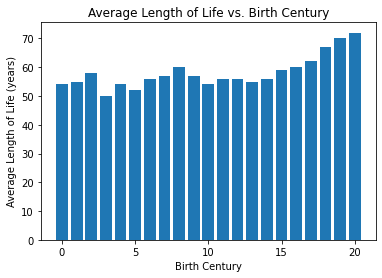

In [109]:
plt.bar(x = avg_life_century_df['birth_century'], height = avg_life_century_df['average_length_of_life'])
plt.title('Average Length of Life vs. Birth Century')
plt.xlabel('Birth Century')
plt.ylabel('Average Length of Life (years)')
plt.plot()

# Conclusions:
- There aren't a lot of people included in the dataset from before the 0th century so those values are a bit less relavent to understanding the relationship between birth century and length of life
- Similarly, the average length of life of people in this dataset born in the 21st century is 9 years. This value is so low because the 21st century began relatively recently and this dataset only includes people that have already died. This value isn't indicative of how long someone the 21st century can expect to live, on average. 
- Although there isn't a strict increase in average length of life, the 18th, 19th, and 20th centuries have some of the highest average life lengths. 
- As expected, for the most part, average life expectancy increases the closer to present day you are born, on average. 

# Question 5: What are the most common names in the dataset?

In [11]:
%%sql
--make a column for just first names

ALTER TABLE People
ADD first_name text;

 * postgresql://isdb@localhost/postgres
(psycopg2.errors.DuplicateColumn) column "first_name" of relation "people" already exists

[SQL: --make a column for just first names

ALTER TABLE People
ADD first_name text;]
(Background on this error at: https://sqlalche.me/e/14/f405)


In [99]:
%%sql
pop_names << 
    SELECT name
    FROM People;

 * postgresql://isdb@localhost/postgres
1223009 rows affected.
Returning data to local variable pop_names


In [100]:
mco_names = pop_names.DataFrame()

In [101]:
mco_names

,name
0,Douglas Adams
1,Abraham Lincoln
2,Paul Morand
3,Claude Monet
4,Diego Velázquez
...,...
1223004,James Collins
1223005,James Collisson
1223006,James Collis
1223007,James Colt


In [102]:
split_name = mco_names['name'].str.split(" ",expand = True)
split_name

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Douglas,Adams,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Abraham,Lincoln,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Paul,Morand,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Claude,Monet,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Diego,Velázquez,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223004,James,Collins,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1223005,James,Collisson,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1223006,James,Collis,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1223007,James,Colt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [103]:
name_count = split_name[0].groupby(split_name[0]).agg('count')

In [104]:
name_count

0
"Big"       1
"Dandy"     1
"Dr.        1
"Killer"    1
"Molly"     1
           ..
황패          1
황현주         1
황호림         1
황호현         1
후루타         1
Name: 0, Length: 60803, dtype: int64

In [105]:
names_df = pd.DataFrame({'name':name_count.index, 'count':name_count.values})

In [106]:
names_df_top10 = names_df.sort_values(by='count', ascending=False).head(10)

[]

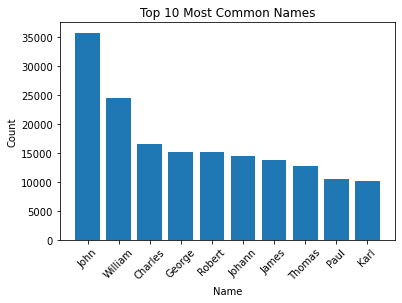

In [108]:
plt.bar(x = names_df_top10['name'], height = names_df_top10['count'])
plt.xticks(rotation = 45)
plt.title('Top 10 Most Common Names')
plt.xlabel('Name')
plt.ylabel('Count')
plt.plot()

# Conclustions:
- The top 3 most common names are John, William, and Charles
- John is by far the most common name in the dataset